# CSC3303 Big Data Analysis Assignment 2 - Big Game Census

## Title : Predictive Analysis of Population Estimation using Linear Regression

### Group Members :

* Muhammad Amiruddin bin Bustaman (1711905)
* Ahmad Husnee bin Abdul Shukor (1711995)
* Luqman bin Mohammad (1714425)
* Muhammad Nuqman Bin Manja (1719301)
* Muhammad Amiruddin Bin Bustaman (1711905)
* Muhammad Laziem Bin Shafie (1621781)


**Description**

The Big Game Census looks at Super Bowl players and their birthplaces, and gives you access to related population data.

**Summary**

# About this Dataset

The recently released Big Game Census data visualization @(https://www.census.gov/library/visualizations/interactive/big-game-census.html) includes player data (from Yahoo Sports: https://sports.yahoo.com/nfl/teams/) and U.S. Census Bureau Population Estimates data for incorporated places and states, vintage 2016 and 2017, respectively.

![Big Game Census](https://media.data.world/DxKrDRBTiirmChMHSKLx_BigGameCensus-screenshot-mid.jpg)

# Objectives

This Big Game Census data visualization takes a fun look at where Super Bowl 52 players come from, the related population figures, and opens up pathways (via embedded links) to additional census data points.

# Background

* The dataset came about when two hapless data nerds had their teams eliminated from the playoffs, thus turning to data to try to find more rooting interests for Super Bowl 52?
* The rosters for both, competing teams are included, with the corresponding roster information and birth place and state population information.
* The developers utilized census data pulled from census.gov, roster information from Yahoo Sports, and designed the data visualization within the Tableau platform.

# Get involved

How can others contribute?

* Identify fun facts you've found within this data and/or data visualization, and has that swayed your rooting interest in the game?
* Share your ideas for a fun data visualization involving interesting data points.

# External resources

Big Game Census dataviz: https://www.census.gov/library/visualizations/interactive/big-game-census.html



# Getting Started

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns 
import matplotlib.pyplot as plt # visualization tool
import os
from IPython.display import display
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

print(os.listdir("."))

['The Big Game Census.ipynb', 'All Places Census 2016 Population Estimates.xlsx', '.ipynb_checkpoints', 'Big Game Census data.xlsx', 'All states Census 2017 Population Estimates.xlsx']


In [2]:
# Loading datasets
all_state = pd.read_excel('All states Census 2017 Population Estimates.xlsx')
all_place = pd.read_excel('All Places Census 2016 Population Estimates.xlsx')
big_game = pd.read_excel('Big Game Census data.xlsx')

# Data Preprocesing

In [3]:
all_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
GEOID                                        52 non-null object
GEOID2                                       52 non-null int64
Geography Name                               52 non-null object
April 1, 2010 - Census                       52 non-null int64
April 1, 2010 - Estimates Base               52 non-null int64
Population Estimate (as of July 1) - 2010    52 non-null int64
Population Estimate (as of July 1) - 2011    52 non-null int64
Population Estimate (as of July 1) - 2012    52 non-null int64
Population Estimate (as of July 1) - 2013    52 non-null int64
Population Estimate (as of July 1) - 2014    52 non-null int64
Population Estimate (as of July 1) - 2015    52 non-null int64
Population Estimate (as of July 1) - 2016    52 non-null int64
Population Estimate (as of July 1) - 2017    52 non-null int64
dtypes: int64(11), object(2)
memory usage: 5.4+ KB


In [38]:
all_state.describe()

,State GEO ID,2010,2011,2012,2013,2014,2015,2016,2017
count,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,29.788462,6.020384e+06,6.063904e+06,6.108226e+06,6.150530e+06,6.195335e+06,6.240635e+06,6.284855e+06,6.328007e+06
std,16.774557,6.779468e+06,6.848039e+06,6.917273e+06,6.982359e+06,7.056337e+06,7.131146e+06,7.197166e+06,7.257007e+06
min,1.000000,5.643760e+05,5.676020e+05,5.766080e+05,5.823410e+05,5.833340e+05,5.861020e+05,5.849100e+05,5.793150e+05
25%,16.750000,1.765195e+06,1.777026e+06,1.789815e+06,1.791796e+06,1.793316e+06,1.792156e+06,1.791484e+06,1.791128e+06
50%,29.500000,4.092510e+06,4.117175e+06,4.138796e+06,4.159392e+06,4.185544e+06,4.219297e+06,4.261051e+06,4.298482e+06
75%,42.500000,6.609054e+06,6.663922e+06,6.717445e+06,6.774206e+06,6.830176e+06,6.889901e+06,7.001715e+06,7.113638e+06
max,72.000000,3.732769e+07,3.767265e+07,3.801901e+07,3.834738e+07,3.870128e+07,3.903244e+07,3.929648e+07,3.953665e+07


In [54]:
# Population Estimate (as of July 1) - 2017
(all_state.max()['2017'], all_state.min()['2017'])

(39536653, 579315)

In [59]:
(all_state[all_state['2017'] == all_state.max()['2017']]['Player Birth State'], all_state[all_state['2017'] == all_state.min()['2017']]['Player Birth State'])

(4    California
 Name: Player Birth State, dtype: object, 50    Wyoming
 Name: Player Birth State, dtype: object)

In [4]:
display(all_state)

,GEOID,GEOID2,Geography Name,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017
0,0400000US01,1,Alabama,4779736,4780135,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
1,0400000US02,2,Alaska,710231,710249,714015,722259,730825,736760,736759,737979,741522,739795
2,0400000US04,4,Arizona,6392017,6392309,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
3,0400000US05,5,Arkansas,2915918,2916031,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279
4,0400000US06,6,California,37253956,37254518,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653
5,0400000US08,8,Colorado,5029196,5029325,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154
6,0400000US09,9,Connecticut,3574097,3574114,3580171,3591927,3597705,3602470,3600188,3593862,3587685,3588184
7,0400000US10,10,Delaware,897934,897936,899712,907884,916868,925114,934805,944107,952698,961939
8,0400000US11,11,District of Columbia,601723,601766,605040,620336,635630,650114,660797,672736,684336,693972
9,0400000US12,12,Florida,18801310,18804594,18846461,19097369,19341327,19584927,19897747,20268567,20656589,20984400


In [5]:
all_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19510 entries, 0 to 19509
Data columns (total 12 columns):
Geographic ID                                19510 non-null object
GEOID 2                                      19510 non-null int64
Geography, full name (City, State)           19510 non-null object
April 1, 2010 - Census                       19510 non-null object
April 1, 2010 - Estimates Base               19510 non-null int64
Population Estimate (as of July 1) - 2010    19510 non-null int64
Population Estimate (as of July 1) - 2011    19510 non-null int64
Population Estimate (as of July 1) - 2012    19510 non-null int64
Population Estimate (as of July 1) - 2013    19510 non-null int64
Population Estimate (as of July 1) - 2014    19510 non-null int64
Population Estimate (as of July 1) - 2015    19510 non-null int64
Population Estimate (as of July 1) - 2016    19510 non-null int64
dtypes: int64(9), object(3)
memory usage: 1.8+ MB


In [6]:
all_place.head(10)

,Geographic ID,GEOID 2,"Geography, full name (City, State)","April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016
0,1620000US0100124,100124,"Abbeville city, Alabama",2688,2688,2683,2685,2647,2631,2619,2616,2603
1,1620000US0100460,100460,"Adamsville city, Alabama",4522,4522,4517,4495,4472,4447,4428,4395,4360
2,1620000US0100484,100484,"Addison town, Alabama",758,756,754,753,748,748,747,740,738
3,1620000US0100676,100676,"Akron town, Alabama",356,356,355,345,345,342,337,337,334
4,1620000US0100820,100820,"Alabaster city, Alabama",30352,31066,31176,31362,31663,31960,32167,32751,32948
5,1620000US0100988,100988,"Albertville city, Alabama",21160,21127,21152,21335,21386,21408,21383,21454,21525
6,1620000US0101132,101132,"Alexander City city, Alabama",14875,14984,14947,14932,14834,14928,14905,14792,14773
7,1620000US0101228,101228,"Aliceville city, Alabama",2486,2481,2478,2431,2430,2410,2384,2376,2357
8,1620000US0101396,101396,"Allgood town, Alabama",622,622,623,627,628,628,627,628,627
9,1620000US0101660,101660,"Altoona town, Alabama",933,937,937,935,934,930,927,922,919


In [7]:
big_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 24 columns):
Player Name                                                 119 non-null object
Player Jersey Number                                        118 non-null object
Player Position                                             118 non-null object
Player Age                                                  118 non-null float64
Player Weight (lbs.)                                        118 non-null float64
Years Played                                                118 non-null object
Player Birthplace (city, town, etc.)                        118 non-null object
Player Birth State                                          118 non-null object
Player Birthplace (Combo)                                   118 non-null object
Player College                                              118 non-null object
Player Team                                                 118 non-null object
Conference   

In [8]:
display(big_game)

,Player Name,Player Jersey Number,Player Position,Player Age,Player Weight (lbs.),Years Played,"Player Birthplace (city, town, etc.)",Player Birth State,Player Birthplace (Combo),Player College,Player Team,Conference,2016 Population Estimates (except where otherwise noted),State GEO ID,Full GEOID,Latitude (player birthplace),Longitude (player birthplace),Number from City,Number of Records,American FactFinder Link for more Census data points,Quickfacts Link,State Data Link,Source (Population States 2017),"Birthplace, Population Data Source"
0,Devin McCourty,#32,S/FS,30.0,195.0,8,Nanuet,New York,"Nanuet, New York",Rutgers,New England,AFC,18377,36.0,0400000US36,41.088707,-74.013473,1.0,1.0,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/N...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
1,Danny Amendola,#80,PR/WR/KR,32.0,190.0,9,The Woodlands,Texas,"The Woodlands, Texas",Texas Tech,New England,AFC,108373,48.0,0400000US48,30.173419,-95.504686,1.0,1.0,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/T...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
2,Johnson Bademosi,#29,CB/SPTM/RCB,27.0,206.0,6,Silver Spring,Maryland,"Silver Spring, Maryland",Stanford,New England,AFC,78038,24.0,0400000US24,38.990666,-77.026088,1.0,1.0,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/S...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
3,Chris Hogan,#15,WR,29.0,210.0,5,Wyckoff,New Jersey,"Wyckoff, New Jersey",Monmouth,New England,AFC,17119,34.0,0400000US34,41.009542,-74.172922,1.0,1.0,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/W...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
4,James Develin,#46,RB/FB,29.0,255.0,5,Gilbertsville,Pennsylvania,"Gilbertsville, Pennsylvania",Brown,New England,AFC,5084,42.0,0400000US42,40.320097,-75.610184,1.0,1.0,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/G...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
5,Cameron Fleming,#71,T/ROT,25.0,320.0,4,Fort Hood,Texas,"Fort Hood, Texas",Stanford,New England,AFC,28350,48.0,0400000US48,31.201439,-97.771758,1.0,1.0,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/F...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
6,Patrick Chung,#23,S/SS,30.0,215.0,9,Kingston,Jamaica,"Kingston, Jamaica",Oregon,New England,AFC,3.0 M (Jamaica),73.0,0400000US73,17.971215,-76.792813,1.0,1.0,https://www.census.gov/popclock/world/jm?utm_c...,https://www.census.gov/popclock/world/jm,https://www.census.gov/popclock/world/jm?utm_c...,"U.S. Census Bureau, International Data Base (d...","U.S. Census Bureau, International Data Base (d..."
7,Jonathan Jones,#31,CB/LCB,24.0,190.0,2,Carrollton,Georgia,"Carrollton, Georgia",Auburn,New England,AFC,26562,13.0,0400000US13,33.580110,-85.076611,1.0,1.0,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/C...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2016 Annual Estimates of t..."
8,Brandin Cooks,#14,WR,24.0,189.0,4,Stockton,California,"Stockton, California",Oregon State,New England,AFC,307072,6.0,0400000US06,37.957702,-121.2907

In [9]:
big_game.describe()

,Player Age,Player Weight (lbs.),State GEO ID,Latitude (player birthplace),Longitude (player birthplace),Number from City,Number of Records
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0
mean,26.720339,243.881356,28.330508,35.566567,-92.820792,1.152542,1.0
std,3.653556,45.959322,17.071521,7.449830,20.707252,0.426216,0.0
min,21.000000,167.000000,1.000000,-14.252294,-170.713450,1.000000,1.0
25%,24.000000,205.000000,12.000000,32.416135,-97.764743,1.000000,1.0
50%,26.000000,238.000000,31.000000,36.164258,-86.614908,1.000000,1.0
75%,29.000000,274.000000,40.500000,40.411295,-80.155949,1.000000,1.0
max,40.000000,350.000000,75.000000,51.507322,-0.127647,3.000000,1.0


In [84]:
big_game['Player Team'].value_counts()

New England     60
Philadelphia    58
Name: Player Team, dtype: int64

In [10]:
# check for missing value
all_state.isnull().sum()

GEOID                                        0
GEOID2                                       0
Geography Name                               0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0
Population Estimate (as of July 1) - 2013    0
Population Estimate (as of July 1) - 2014    0
Population Estimate (as of July 1) - 2015    0
Population Estimate (as of July 1) - 2016    0
Population Estimate (as of July 1) - 2017    0
dtype: int64

In [11]:
all_place.isnull().sum()

Geographic ID                                0
GEOID 2                                      0
Geography, full name (City, State)           0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0
Population Estimate (as of July 1) - 2013    0
Population Estimate (as of July 1) - 2014    0
Population Estimate (as of July 1) - 2015    0
Population Estimate (as of July 1) - 2016    0
dtype: int64

In [12]:
big_game.isnull().sum()

Player Name                                                 2
Player Jersey Number                                        3
Player Position                                             3
Player Age                                                  3
Player Weight (lbs.)                                        3
Years Played                                                3
Player Birthplace (city, town, etc.)                        3
Player Birth State                                          3
Player Birthplace (Combo)                                   3
Player College                                              3
Player Team                                                 3
Conference                                                  3
2016 Population Estimates (except where otherwise noted)    3
State GEO ID                                                3
Full GEOID                                                  3
Latitude (player birthplace)                                3
Longitud

# Data Cleaning and Data Wrangling

In [13]:
# missing data at row 118 - 120, removing null values
all_state = all_state[~(all_state.isnull().any(axis=1))]

### Transposing 2017 Census Estimate Population

In [14]:
# Transpose 2017 Census Estimate Population
all_state_trans =(all_state.drop(all_state.columns[:2],axis=1).drop(all_state.columns[3:5],axis=1)).set_index('Geography Name').transpose().reset_index()

In [15]:
# renaming index column
all_state_trans.rename(columns={'index':'year'}, inplace=True)
year = 2010
for i in range(len(all_state_trans)):
    all_state_trans['year'].iloc[i] = year
    year += 1

In [16]:
all_state_trans

Geography Name,year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,2010,4785579,714015,6407002,2921737,37327690,5048029,3580171,899712,605040,18846461,9712696,1363817,1570912,12841196,6490029,3050223,2858403,4347948,4544871,1327568,5788099,6564943,9876731,5310711,2970437,5995681,990507,1829956,2702797,1316700,8803708,2064607,19405185,9574247,674518,11539282,3759529,3837073,12711063,1053169,4635834,816227,6355882,25241648,2775260,625842,8025206,6741386,1854315,5690403,564376,3721525
1,2011,4798649,722259,6465488,2938640,37672654,5116411,3591927,907884,620336,19097369,9810595,1378323,1583180,12862298,6515358,3063690,2868756,4368505,4574388,1327968,5843115,6612178,9876199,5345967,2977452,6010280,996866,1841641,2718170,1318345,8844694,2077744,19526372,9662940,684830,11543332,3785232,3865845,12742811,1052154,4672744,823338,6396281,25644424,2815430,626210,8107548,6819155,1854891,5705812,567602,3678732
2,2012,4813946,730825,6544211,2949208,38019006,5186330,3597705,916868,635630,19341327,9911171,1392772,1594673,12878494,6535665,3074386,2885316,4383673,4602681,1328101,5891680,6659627,9886610,5377695,2982963,6023267,1003522,1854862,2752410,1320923,8882095,2083590,19625409,9755299,701380,11546969,3815298,3893920,12768034,1052761,4719009,832576,6450632,26078327,2854222,625606,8188656,6890899,1855360,5721075,576608,3634488
3,2013,4827660,736760,6616124,2956780,38347383,5262556,3602470,925114,650114,19584927,9981773,1408038,1610187,12890403,6567484,3089876,2892900,4399121,4626795,1327975,5932654,6711138,9899219,5416074,2987721,6041142,1011921,1867414,2786547,1322622,8913735,2085161,19712514,9849812,722908,11567845,3849840,3919664,12778450,1052784,4765862,842513,6490795,26479279,2899961,626044,8261689,6963410,1852333,5736673,582341,3593077
4,2014,4840037,736759,6706435,2964800,38701278,5342311,3600188,934805,660797,19897747,10083850,1417710,1630391,12882438,6593182,3105563,2899553,4410415,4648797,1328903,5970245,6757925,9914675,5452649,2988578,6058014,1019931,1880920,2831730,1328684,8943010,2083207,19773580,9941160,738658,11593741,3875008,3960673,12790341,1054782,4824758,849455,6540007,26954436,2938671,625665,8316902,7046931,1847624,5751272,583334,3534874
5,2015,4850858,737979,6802262,2975626,39032444,5440445,3593862,944107,672736,20268567,10199533,1426320,1649324,12862051,6610596,3118473,2905789,4422057,4671211,1327787,6000561,6794002,9918170,5483238,2985297,6072640,1028317,1893564,2883057,1330134,8960001,2082264,19819347,10041769,754859,11606027,3904353,4016537,12791124,1055916,4892423,854036,6590726,27454880,2984917,624455,8366767,7152818,1839767,5759744,586102,3473177
6,2016,4860545,741522,6908642,2988231,39296476,5530105,3587685,952698,684336,20656589,10313620,1428683,1680026,12835726,6634007,3130869,2907731,4436113,4686157,1330232,6024752,6823721,9933445,5525050,2985415,6091176,1038656,1907603,2939254,1335015,8978416,2085432,19836286,10156689,755548,11622554,3921207,4085989,12787085,1057566,4959822,861542,6649404,27904862,3044321,623354,8414380,7280934,1828637,5772917,584910,3406520
7,2017,4874747,739795,7016270,3004279,39536653,5607154,3588184,961939,693972,20984400,10429379,1427538,1716943,12802023,6666818,3145711,2913123,4454189,4684333,1335907,6052177,6859819,9962311,5576606,2984100,6113532,1050493,1920076,2998039,1342795,9005644,2088070,19849399,10273419,755393,11658609,3930864,4142776,12805537,1059639,5024369,869666,6715984,28304596,3101833,623657,8470020,7405743,1815857,5795483,579315,3337177


### Merging 2017 Census Estimate Population & Big Game Census

In [17]:
# change columns name
all_state.rename(columns={'Population Estimate (as of July 1) - 2010':'2010', 'Population Estimate (as of July 1) - 2011':'2011', 'Population Estimate (as of July 1) - 2012':'2012', 'Population Estimate (as of July 1) - 2013':'2013', 'Population Estimate (as of July 1) - 2014':'2014', 'Population Estimate (as of July 1) - 2015':'2015', 'Population Estimate (as of July 1) - 2016':'2016', 'Population Estimate (as of July 1) - 2017':'2017'}, inplace=True)

In [18]:
# Drop some unused columns
all_state.drop(all_state.columns[3:5], axis=1, inplace=True)

In [19]:
all_state.rename(columns={'GEOID':'GEO ID', 'GEOID2':'State GEO ID', 'Geography Name':'Player Birth State'}, inplace=True)
all_state['State GEO ID'] = all_state['State GEO ID'].astype('float')

In [20]:
# Drop some unused columns
big_game.drop(["Player Birthplace (city, town, etc.)", "Player Birthplace (Combo)", "2016 Population Estimates (except where otherwise noted)", "Number from City", "Number of Records", "American FactFinder Link for more Census data points", "Quickfacts Link", "State Data Link", "Source (Population States 2017)", "Birthplace, Population Data Source"], axis=1, inplace=True)

In [21]:
# Rename columns
big_game.rename(columns={'Full GEOID':'GEO ID', 'Latitude (player birthplace)':'Latitude', 'Longitude (player birthplace)':'Longitude'}, inplace=True)

In [22]:
# Merged Data
data = pd.merge(big_game, all_state, on=['GEO ID', 'State GEO ID', 'Player Birth State'])

In [23]:
data['Player Age'] = data['Player Age'].astype('int')
data['State GEO ID'] = data['State GEO ID'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 22 columns):
Player Name             115 non-null object
Player Jersey Number    115 non-null object
Player Position         115 non-null object
Player Age              115 non-null int64
Player Weight (lbs.)    115 non-null float64
Years Played            115 non-null object
Player Birth State      115 non-null object
Player College          115 non-null object
Player Team             115 non-null object
Conference              115 non-null object
State GEO ID            115 non-null int64
GEO ID                  115 non-null object
Latitude                115 non-null float64
Longitude               115 non-null float64
2010                    115 non-null int64
2011                    115 non-null int64
2012                    115 non-null int64
2013                    115 non-null int64
2014                    115 non-null int64
2015                    115 non-null int64
2016                

# Exploratory Data Analysis (EDA)

### Population growth across all states in USA 2017
Data visualization of estimate population in each states in 2017

In [69]:
state_population_2017 = all_state[['Player Birth State', '2017']]

In [82]:
state_population_2017.shape

(52, 2)

In [70]:
state_population_2017.sort_values(by='2017', ascending=False)

,Player Birth State,2017
4,California,39536653
43,Texas,28304596
9,Florida,20984400
32,New York,19849399
38,Pennsylvania,12805537
13,Illinois,12802023
35,Ohio,11658609
10,Georgia,10429379
33,North Carolina,10273419
22,Michigan,9962311


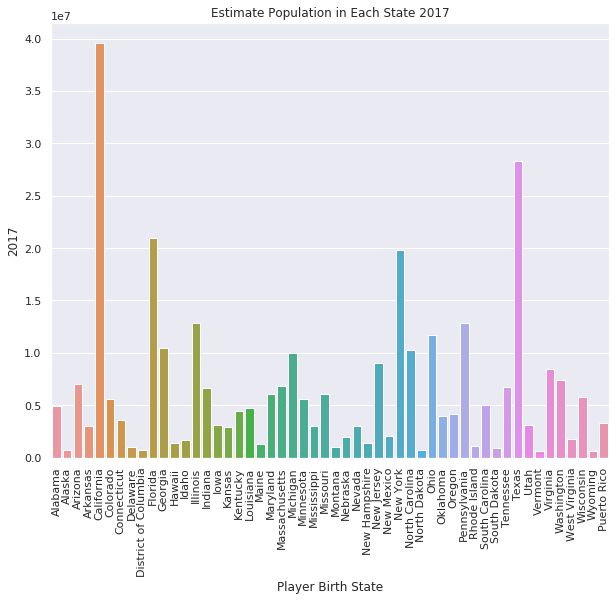

In [72]:
sns.set()
plt.figure(figsize=(10,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.barplot(x='Player Birth State', y='2017', data=state_population_2017)
plt.title("Estimate Population in Each State 2017")
plt.xticks(rotation=90)
plt.show()

### Population By Years Analysis
To obeserve the growth of populations of all states alltogether from 2016-2017 

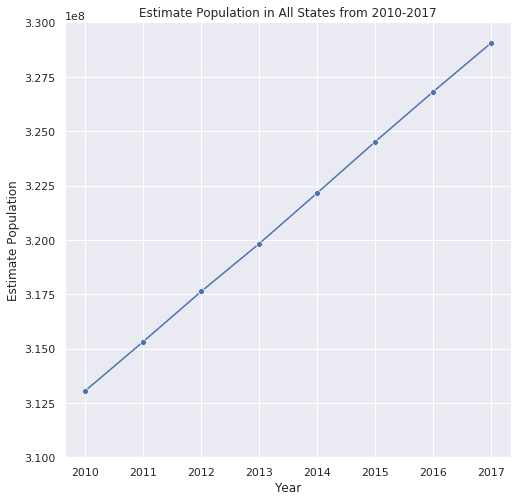

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.lineplot(all_state_trans.year , all_state_trans.sum(axis=1), marker='o').set_ylim(310000000,330000000)
plt.ylabel("Estimate Population")
plt.xlabel("Year")
plt.title("Estimate Population in All States from 2010-2017")
plt.show()

### Player Count From Each States Analysis

In [73]:
player_from_state = pd.DataFrame(data.groupby('Player Birth State')['Player Name'].count()).reset_index()
player_from_state.rename(columns={'Player Name':'Player Count'}, inplace=True)

In [81]:
player_from_state[player_from_state['Player Count'] == 0]['Player Birth State'].shape

(0,)

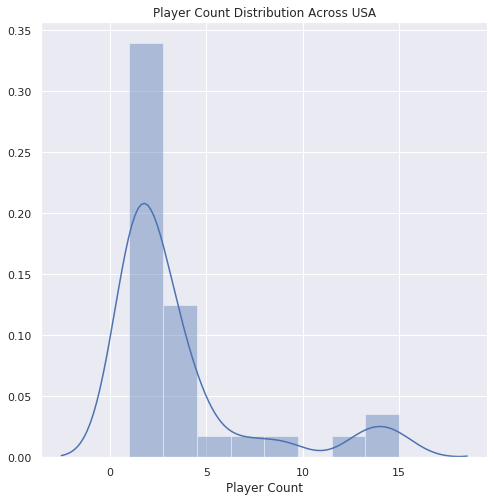

In [25]:
plt.figure(figsize=(8,8))
ax = sns.distplot(player_from_state['Player Count'])
plt.title("Player Count Distribution Across USA")
plt.show()

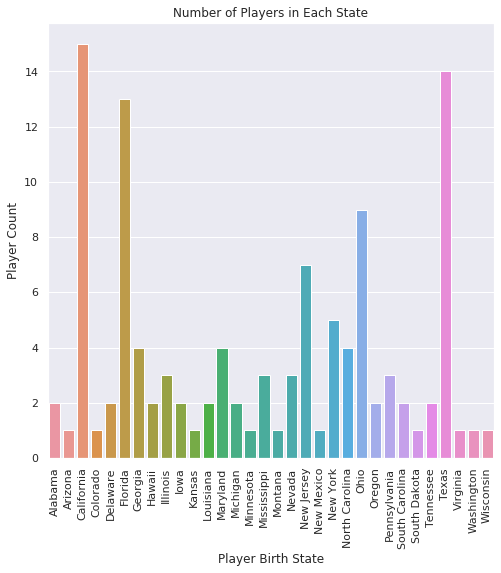

In [26]:
plt.figure(figsize=(8,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.barplot(x='Player Birth State', y='Player Count', data=player_from_state)
plt.title("Number of Players in Each State")
plt.xticks(rotation=90)
plt.show()

# Predictive Analytics
Build a prediction model using Linear Regression on USA States Population Estimates from 2010-2017 

In [27]:
# Using sklearn module
X = all_state_trans['year'].values.reshape(-1,1)
y = all_state_trans.sum(axis=1).values.reshape(-1,1)

In [28]:
# Split training & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Train data
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regressor.score(X,y)

0.9999483833417642

In [31]:
#To retrieve the intercept:
print('Intercept:',regressor.intercept_)
#For retrieving the slope:
print('Coefficient(slope):',regressor.coef_)

Intercept: [-4.28608514e+09]
Coefficient(slope): [[2288117.57]]


In [32]:
y_pred = regressor.predict(X_test)

In [33]:
all_state_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
all_state_pred

,Actual,Predicted
0,326814471,3.267599e+08
1,317629772,3.176074e+08


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 38478.120000362396
Mean Squared Error: 1740238316.9608238
Root Mean Squared Error: 41716.16373734315


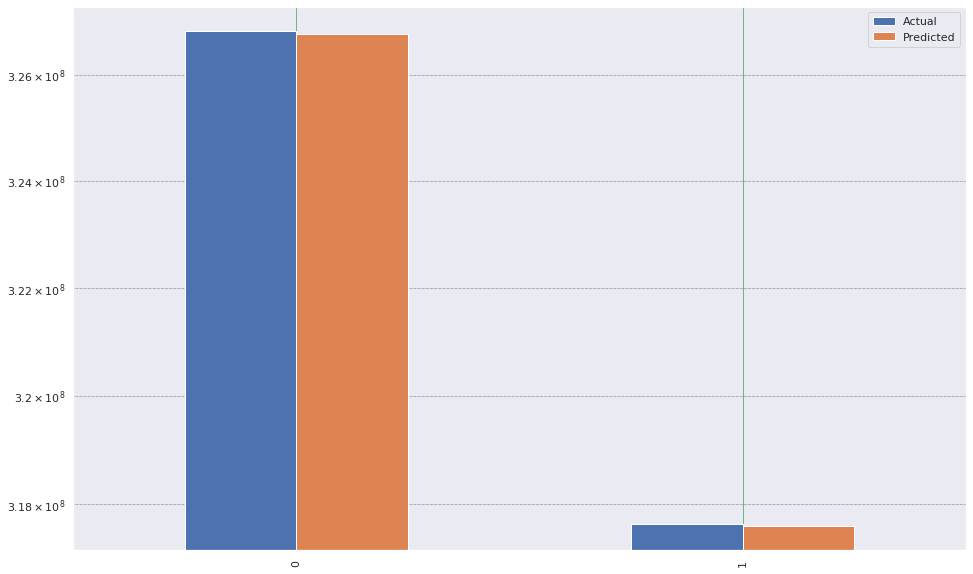

In [35]:
all_state_pred1 = all_state_pred.head(25)
all_state_pred1.plot(kind='bar',figsize=(16,10)).set_yscale('log')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [36]:
# predict estimate populations value from 2018-2022
x_new = np.array([[2018],[2019],[2020],[2021],[2022]])
y_new = regressor.predict(x_new)
y_new

array([[3.31336114e+08],
       [3.33624231e+08],
       [3.35912349e+08],
       [3.38200466e+08],
       [3.40488584e+08]])

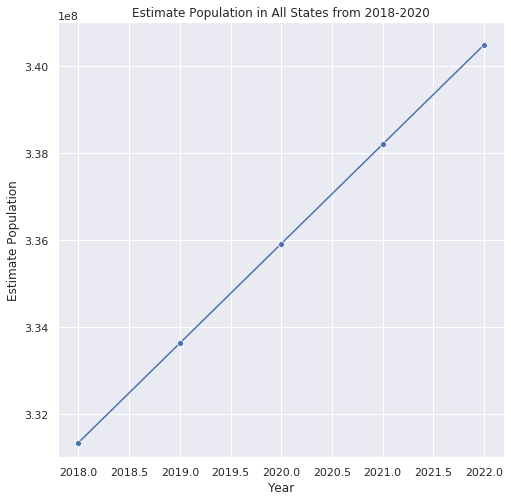

In [37]:
all_state_new = pd.DataFrame({'Estimate Population':y_new.flatten(), 'Year':x_new.flatten()})
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.lineplot(x='Year' , y='Estimate Population', data=all_state_new, marker='o').set_ylim(331000000,341000000)
plt.ylabel("Estimate Population")
plt.xlabel("Year")
plt.title("Estimate Population in All States from 2018-2020")
plt.show()

# Data Visualization

![alt text](bigcencus.jpeg)

# Simple Analysis

   The data above describe the American Football Super Bowl Players Detail with related estimate population in every USA states. Three datasets provided are Population Estimate from 2010-2016 in every place in each state, Population Estimate from 2010-2017 in all states, and Big Game Census which represent player's detail.
    
   Through EDA we can observe that California is the most populated state in USA while Wyorming is the least populated. Among 52 states, only 32 states that have players participated in the Big Game. Being the most populated states, California also have the highest player count that participated in the Big Game followed by Texas, then Florida. 
    
   We run a predictive analysis using the data to estimate the population in each state from 2018-2022. We use linear regression because the data behaviour is linear. For data sampling, we use 5 fold stratified cross validation. After training the data we got prediction score of 0.9999483833417642 which is the regression proven pretty accurate.